In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r"C:\Users\Dell\Documents\Cargo\Python files\Dheeraj\Web Scraping\Team C Refrigerator Data.xlsx")

In [3]:
# data of dimension
data1=pd.read_csv(r"C:\Users\Dell\Documents\Cargo\Python files\Dheeraj\Web Scraping\dimension_refrigerator_dataset.csv")

In [4]:
data1=data1.drop_duplicates(subset='Name', keep='first', inplace=False)

In [5]:
data = pd.merge(left=data, right=data1, how='inner', left_on='Product Name', right_on='Name')

In [6]:
data=data.drop(['Unnamed: 0','Name'],axis=1)
data.head()

,Product Name,Product Rating,Prices in Rs,Max Price,In The Box,Type,Refrigerator Type,Defrosting Type,Compressor Type,Capacity,Number of Doors,Star Rating,Coolpad,Toughened Glass,Built-in Stabilizer,Company Name,Height,Width,Depth,Weight
0,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,12740.0,14900.0,"1 Refrigerator Unit, Warranty Card, User Manual",Single Door,Top Freezer Refrigerator,Direct Cool,Normal Compressor,190 L,1,2,No,Yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
1,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,11990.0,14400.0,"1 Refrigerator, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,Normal Compressor,190 L,1,2,No,No,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
2,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,11990.0,14400.0,"1 Refrigerator, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,Normal Compressor,190 L,1,2,No,No,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
3,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,13740.0,16000.0,"1 Refrigerator Unit, Warranty Card, User Manual",Single Door,Top Freezer Refrigerator,Direct Cool,Normal Compressor,190 L,1,2,No,Yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,12740.0,14900.0,"1 Refrigerator Unit, Warranty Card, User Manual",Single Door,Top Freezer Refrigerator,Direct Cool,Normal Compressor,190 L,1,2,No,Yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg


In [7]:
data.shape

(833, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 832
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         828 non-null    object 
 1   Product Rating       635 non-null    float64
 2   Prices in Rs         828 non-null    float64
 3   Max Price            807 non-null    float64
 4   In The Box           831 non-null    object 
 5   Type                 833 non-null    object 
 6   Refrigerator Type    833 non-null    object 
 7   Defrosting Type      833 non-null    object 
 8   Compressor Type      832 non-null    object 
 9   Capacity             833 non-null    object 
 10  Number of Doors      833 non-null    int64  
 11  Star Rating          769 non-null    object 
 12  Coolpad              833 non-null    object 
 13  Toughened Glass      833 non-null    object 
 14  Built-in Stabilizer  833 non-null    object 
 15  Company Name         828 non-null    obj

In [9]:
data.isnull().sum()

Product Name             5
Product Rating         198
Prices in Rs             5
Max Price               26
In The Box               2
Type                     0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          1
Capacity                 0
Number of Doors          0
Star Rating             64
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             5
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

### droping columns without product name as it is one of most important columns

In [10]:
data=data.dropna(subset=['Product Name'])

In [11]:
data.isnull().sum()

Product Name             0
Product Rating         193
Prices in Rs             0
Max Price               21
In The Box               2
Type                     0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          1
Capacity                 0
Number of Doors          0
Star Rating             63
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             0
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

### From capacity column we will remove mention of liters

In [12]:
data['Capacity'] = data['Capacity'].str.lower() #changing it to lower case
data["Capacity"]=data["Capacity"].str.replace(" l","")

In [13]:
data.sample(5)

,Product Name,Product Rating,Prices in Rs,Max Price,In The Box,Type,Refrigerator Type,Defrosting Type,Compressor Type,Capacity,Number of Doors,Star Rating,Coolpad,Toughened Glass,Built-in Stabilizer,Company Name,Height,Width,Depth,Weight
48,LG 190 L Direct Cool Single Door 3 Star Refrig...,4.4,15999.0,17690.0,"1 Refrigerator Unit, Owner Manual",Single Door,Top Freezer Refrigerator,Direct Cool,Normal Compressor,190,1,3,No,Yes,Yes,LG,1172 mm,534 mm,633 mm,31 kg
23,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,NaN,18499.0,20290.0,"1 Refrigerator Unit, Owner Manual",Single Door,Top Freezer Refrigerator,Direct Cool,Digital Inverter Compressor,198,1,4,Yes,Yes,Yes,SAMSUNG,132.5 cm,57.8 cm,71.5 cm,39 kg
550,Haier 320 L Frost Free Double Door 2 Star Refr...,4.1,37599.0,48600.0,1 RefrigeratorUser ManualWarranty CardKeyIce Tray,Double Door,Bottom Mount,Frost Free,Reciprocatory Compressor,320,2,2,No,Yes,Yes,Haier,1600 mm,595 mm,641.5 mm,72 kg
530,LG 185 L Direct Cool Single Door 2 Star Refrig...,NaN,14250.0,14990.0,"1 Refrigerator Unit, User Manual",Single Door,Top Mount,Direct Cool,Smart Inverter Compressor,185,1,2,No,No,Yes,LG,1147 mm,538 mm,590 mm,32 kg
516,Godrej 192 L Direct Cool Single Door 5 Star Re...,4.5,17190.0,20500.0,"1 Refrigerator, User Manual and Warranty Card",Single Door,Top Freezer Refrigerator,Direct Cool,Hygiene+ Inverter Technology,192,1,5,No,Yes,No,Godrej,119 cm,57.5 cm,64 cm,37 kg


#### where Max Price is not Given It means Product is being sold for highest price
####  we Put MRP same as Selling Price

In [14]:
data["Max Price"].fillna(data["Prices in Rs"], inplace=True)

In [15]:
data.isnull().sum()

Product Name             0
Product Rating         193
Prices in Rs             0
Max Price                0
In The Box               2
Type                     0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          1
Capacity                 0
Number of Doors          0
Star Rating             63
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             0
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

In [16]:
data.shape

(828, 20)

In [17]:
data['Company Name'].unique()

array(['Whirlpool', 'SAMSUNG', 'LG', 'Haier', 'Godrej', 'CANDY', 'ONIDA',
       'Lloyd', 'Midea', 'Liebherr', 'Panasonic', 'MarQ', 'Hisense',
       'BOSCH', 'Voltas', 'Motorola', 'Hitachi', 'Lifelong', 'Galanz',
       'TOSHIBA', 'Electrolux', 'MOTOROLA', 'MITASHI', 'Croma'],
      dtype=object)

#### Same company Name is multiple times so we will that

In [18]:
def replace_name(a,b):
    data['Company Name'].replace(a,b,inplace=True)

replace_name('Motorola','MOTOROLA')

- Motorola will change to MOTOROLA

In [19]:
data['Company Name'].unique()

array(['Whirlpool', 'SAMSUNG', 'LG', 'Haier', 'Godrej', 'CANDY', 'ONIDA',
       'Lloyd', 'Midea', 'Liebherr', 'Panasonic', 'MarQ', 'Hisense',
       'BOSCH', 'Voltas', 'MOTOROLA', 'Hitachi', 'Lifelong', 'Galanz',
       'TOSHIBA', 'Electrolux', 'MITASHI', 'Croma'], dtype=object)

In [20]:
data['Company Name'].value_counts()

Whirlpool     216
SAMSUNG       184
LG            147
Haier         103
Godrej         66
Panasonic      25
BOSCH          15
Lloyd           9
Liebherr        8
ONIDA           8
Voltas          8
MarQ            7
Midea           7
Hisense         5
Hitachi         4
TOSHIBA         3
MOTOROLA        3
Lifelong        2
Croma           2
Galanz          2
CANDY           2
MITASHI         1
Electrolux      1
Name: Company Name, dtype: int64

## checking for duplicate entries

In [21]:
data.value_counts()

Product Name                                                                                   Product Rating  Prices in Rs  Max Price  In The Box                                                              Type          Refrigerator Type          Defrosting Type  Compressor Type                  Capacity  Number of Doors  Star Rating          Coolpad  Toughened Glass  Built-in Stabilizer  Company Name  Height    Width    Depth    Weight 
Whirlpool 190 L Direct Cool Single Door 2 Star Refrigerator                                    4.3             11990.0       14400.0    1 Refrigerator, User Manual, Warranty Card                              Single Door   Top Freezer                Direct Cool      Normal Compressor                190       1                2                    No       No               Yes                  Whirlpool     1191 mm   536 mm   604 mm   32.4 kg    3
                                                                                                           

In [22]:
data.shape

(828, 20)

### droping duplicate entries

In [23]:
data=data.drop_duplicates(subset=None, keep='first', inplace=False)

In [24]:
data.value_counts()

Product Name                                                                                 Product Rating  Prices in Rs  Max Price  In The Box                                                 Type          Refrigerator Type          Defrosting Type  Compressor Type              Capacity  Number of Doors  Star Rating          Coolpad  Toughened Glass  Built-in Stabilizer  Company Name  Height    Width    Depth    Weight 
BOSCH 288 L Frost Free Double Door 3 Star Refrigerator                                       4.2             25990.0       34999.0    1 Refrigerator UnitUser ManualEgg Tray                     Double Door   Top Mount                  Frost Free       Vario Inverter Compressor    288       2                3                    No       Yes              Yes                  BOSCH         167.9 cm  62.8 cm  60.5 cm  65.8 kg    1
SAMSUNG 253 L Frost Free Double Door 3 Star Refrigerator                                     4.4             24690.0       28490.0    1 Unit Refr

In [25]:
data.shape

(781, 20)

In [26]:
data.isnull().sum()

Product Name             0
Product Rating         187
Prices in Rs             0
Max Price                0
In The Box               2
Type                     0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          1
Capacity                 0
Number of Doors          0
Star Rating             62
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             0
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

### dealing wirh Compressor Column

In [27]:
data['Compressor Type'].nunique()

56

In [28]:
data['Compressor Type'].unique()

array(['Normal Compressor', 'Linear Compressor',
       'Reciprocatory Compressor', 'Digital Inverter Compressor',
       'Smart Inverter Compressor', 'Reciprocating Compressor',
       'Intelligent Inverter Compressor', 'Inverter Compressor',
       'Non Inverter Compressor', 'DC Inverter Compressor', 'Rotary',
       'Donper', 'Hygiene Plus Inverter Compressor',
       'IntelliSense Inverter Compressor', 'Liner Compressor',
       'Smart inverter compressor', 'INVERTER Compressor',
       'Conventional Compressor', 'Digital Inverter',
       'Intellisense Inverter', 'Inverter',
       'Intellisense Inverter Compressor', 'Rotary Compressor',
       'Digital Compressor', 'Inverter Linear Compressor',
       'Equipped with a normal compressor', 'Inverter Linear',
       'Reciprocating', 'Digital Inverter Technology Compressor',
       'Multi Inverter Technology', 'NORMAL', 'Normal',
       'Nextgen 8 Step Inverter Compressor', 'inverter',
       'NORMAL COMPRESSOR', 'INVERTER COMPRESSOR

In [29]:
# changing string to lower case
data['Compressor Type'] = data['Compressor Type'].str.lower() 

In [30]:
data['Compressor Type'].unique()

array(['normal compressor', 'linear compressor',
       'reciprocatory compressor', 'digital inverter compressor',
       'smart inverter compressor', 'reciprocating compressor',
       'intelligent inverter compressor', 'inverter compressor',
       'non inverter compressor', 'dc inverter compressor', 'rotary',
       'donper', 'hygiene plus inverter compressor',
       'intellisense inverter compressor', 'liner compressor',
       'conventional compressor', 'digital inverter',
       'intellisense inverter', 'inverter', 'rotary compressor',
       'digital compressor', 'inverter linear compressor',
       'equipped with a normal compressor', 'inverter linear',
       'reciprocating', 'digital inverter technology compressor',
       'multi inverter technology', 'normal',
       'nextgen 8 step inverter compressor',
       '6 speed inverter compressor', 'vario inverter compressor',
       'reciprocatory', 'hygiene+ inverter technology',
       'twin inverter compressor', 'triple invert

In [31]:
data['Compressor Type'].nunique()

45

In [32]:
def replace_name(a,b):
    data['Compressor Type'].replace(a,b,inplace=True)

#on normal compressor names
replace_name('normal','normal compressor')
replace_name('normal cpmpressor','normal compressor')
replace_name('non inverter compressor','normal compressor')
replace_name('equipped with a normal compressor','normal compressor')
replace_name('non-inverter compressor','normal compressor')
replace_name('fixed speed compressor','normal compressor')
replace_name('non inverter','normal compressor')
replace_name('compressor, fixed speed','normal compressor')
replace_name('donper','normal compressor')
replace_name('reciprocatory compressor','normal compressor')
replace_name('reciprocating compressor','normal compressor')
replace_name('liner compressor','normal compressor')
replace_name('conventional compressor','normal compressor')
replace_name('reciprocating','normal compressor')
replace_name('linear compressor','normal compressor')
replace_name('reciprocatory','normal compressor')


# on inverter compressor names
replace_name('digital inverter compressor','inverter compressor')
replace_name('smart inverter compressor','inverter compressor')
replace_name('intelligent inverter compressor','inverter compressor')
replace_name('dc inverter compressor','inverter compressor')
replace_name('hygiene plus inverter compressor','inverter compressor')
replace_name('digital inverter','inverter compressor')
replace_name('intellisense inverter compressor','inverter compressor')
replace_name('intellisense inverter','inverter compressor')
replace_name('digital inverter technology compressor','inverter compressor')
replace_name('inverter linear compressor','inverter compressor')
replace_name('inverter linear','inverter compressor')
replace_name('nextgen 8 step inverter compressor','inverter compressor')
replace_name('digital compressor','inverter compressor')
replace_name('vario inverter compressor','inverter compressor')
replace_name('prosmart inverter compressor','inverter compressor')
replace_name('hygiene+ inverter technology','inverter compressor')
replace_name('inventer','inverter compressor')
replace_name('6 speed inverter compressor','inverter compressor')
replace_name('smart inverter','inverter compressor')
replace_name('advanced inverter compressor technology','inverter compressor')
replace_name('r600a (inverter)','inverter compressor')
replace_name('r600a','inverter compressor')
replace_name('inverter technology','inverter compressor')
replace_name('inverter','inverter compressor')

# on multi inverter Technology
replace_name('twin inverter compressor','multi inverter technology')
replace_name('triple inverter','multi inverter technology')
replace_name('twin inverter technology compressor','multi inverter technology')

# on rotary inverter technology
replace_name('rotary','rotary compressor')

In [33]:
data['Compressor Type'].unique()

array(['normal compressor', 'inverter compressor', 'rotary compressor',
       'multi inverter technology', nan], dtype=object)

In [34]:
data['Compressor Type'].value_counts()

inverter compressor          526
normal compressor            232
rotary compressor             14
multi inverter technology      8
Name: Compressor Type, dtype: int64

### Filling NA in In the box and Compressor type where Not available

In [35]:
data["Compressor Type"].fillna('normal compressor', inplace=True)
data["In The Box"].fillna('NA', inplace=True)

In [36]:
data.isnull().sum()

Product Name             0
Product Rating         187
Prices in Rs             0
Max Price                0
In The Box               0
Type                     0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          0
Capacity                 0
Number of Doors          0
Star Rating             62
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             0
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 832
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         781 non-null    object 
 1   Product Rating       594 non-null    float64
 2   Prices in Rs         781 non-null    float64
 3   Max Price            781 non-null    float64
 4   In The Box           781 non-null    object 
 5   Type                 781 non-null    object 
 6   Refrigerator Type    781 non-null    object 
 7   Defrosting Type      781 non-null    object 
 8   Compressor Type      781 non-null    object 
 9   Capacity             781 non-null    object 
 10  Number of Doors      781 non-null    int64  
 11  Star Rating          719 non-null    object 
 12  Coolpad              781 non-null    object 
 13  Toughened Glass      781 non-null    object 
 14  Built-in Stabilizer  781 non-null    object 
 15  Company Name         781 non-null    obj

### dealing with Type Column

In [38]:
data['Type'].nunique()

9

In [39]:
data['Type'].unique()

array(['Single Door', 'Double Door', 'Double Door Top Mount',
       'Triple Door', 'Side by Side', 'Double Door Bottom Mount',
       'French Door Bottom Mount', 'Multi-Door',
       'Triple Door Bottom Mount'], dtype=object)

In [40]:
def replace_name(a,b):
    data['Type'].replace(a,b,inplace=True)
    
replace_name('Double Door Top Mount','Double Door')  
replace_name('Double Door Bottom Mount','Double Door') 

replace_name('French Door Bottom Mount','Side by Side') 

replace_name('Triple Door Bottom Mount','Multi-Door')
replace_name('Triple Door','Multi-Door')

In [41]:
data=data.rename(columns={'Type':'Door Type'})

In [42]:
data['Door Type'].value_counts()

Single Door     404
Double Door     308
Side by Side     46
Multi-Door       23
Name: Door Type, dtype: int64

### Dealing with Refrigerator Type

In [43]:
data['Refrigerator Type'].nunique()

13

In [44]:
data['Refrigerator Type'].unique()

array(['Top Freezer Refrigerator', 'Top Freezer', 'Top Mount',
       'Bottom Freezer', 'Side by Side Refrigerator', 'Bottom Mount',
       'Bottom Freezer Refrigerator', 'Drawer Refrigerator',
       'Side by Side', 'Compact Refrigerator', 'French Door Refrigerator',
       'Multi-Door Refrigerator', 'Cooling Unit'], dtype=object)

In [45]:
def replace_name(a,b):
    data['Refrigerator Type'].replace(a,b,inplace=True)
    
replace_name('Top Freezer Refrigerator','Top Freezer')  
replace_name('Top Mount','Top Freezer') 

replace_name('Bottom Mount','Bottom Freezer') 
replace_name('Bottom Freezer Refrigerator','Bottom Freezer') 

replace_name('Side by Side Refrigerator','Not Known') 
replace_name('Drawer Refrigerator','Not Known') 
replace_name('Side by Side','Not Known') 
replace_name('Compact Refrigerator','Not Known') 
replace_name('French Door Refrigerator','Not Known') 
replace_name('Multi-Door Refrigerator','Not Known')
replace_name('Cooling Unit','Not Known') 
replace_name('Deep Freezer','Not Known')


In [46]:
data['Refrigerator Type'].value_counts()

Top Freezer       670
Not Known          65
Bottom Freezer     46
Name: Refrigerator Type, dtype: int64

### dealing on Defrosting Type

In [47]:
data['Defrosting Type'].value_counts()

Direct Cool               408
Frost Free                372
Thermoelectric Cooling      1
Name: Defrosting Type, dtype: int64

In [48]:
data = data[data['Defrosting Type'] !='Thermoelectric Cooling' ]

In [49]:
data['Defrosting Type'].value_counts()

Direct Cool    408
Frost Free     372
Name: Defrosting Type, dtype: int64

### on star Rating Column

In [50]:
data['Star Rating'].unique()

array([2, 4, 3, 1, 5, nan, 'Inverter Technology'], dtype=object)

In [51]:
data['Star Rating'].replace('Inverter Technology',None,inplace=True)

In [52]:
data['Star Rating'].value_counts()

3    321
2    239
4    116
5     34
1      8
Name: Star Rating, dtype: int64

### for coolpad column

In [53]:
data['Coolpad'].value_counts()

No     635
Yes    121
NO      21
no       2
YES      1
Name: Coolpad, dtype: int64

In [54]:
data['Coolpad'] = data['Coolpad'].str.lower() 

In [55]:
data['Coolpad'].value_counts()

no     658
yes    122
Name: Coolpad, dtype: int64

### on Toughened glass column

In [56]:
data['Toughened Glass'].value_counts()

Yes    724
No      30
YES     16
NO       8
yes      2
Name: Toughened Glass, dtype: int64

In [57]:
data['Toughened Glass'] = data['Toughened Glass'].str.lower() 

In [58]:
data['Toughened Glass'].value_counts()

yes    742
no      38
Name: Toughened Glass, dtype: int64

### on Built-in Stabilizer

In [59]:
data['Built-in Stabilizer'].value_counts()

Yes    720
No      60
Name: Built-in Stabilizer, dtype: int64

In [60]:
data.isnull().sum()

Product Name             0
Product Rating         187
Prices in Rs             0
Max Price                0
In The Box               0
Door Type                0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          0
Capacity                 0
Number of Doors          0
Star Rating             62
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             0
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

### changing numeric column datatype where it is object

In [61]:
data['Star Rating']=pd.to_numeric(data['Star Rating'])
data['Product Rating']=pd.to_numeric(data['Product Rating'])
data['Capacity']=pd.to_numeric(data['Capacity'])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 832
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         780 non-null    object 
 1   Product Rating       593 non-null    float64
 2   Prices in Rs         780 non-null    float64
 3   Max Price            780 non-null    float64
 4   In The Box           780 non-null    object 
 5   Door Type            780 non-null    object 
 6   Refrigerator Type    780 non-null    object 
 7   Defrosting Type      780 non-null    object 
 8   Compressor Type      780 non-null    object 
 9   Capacity             780 non-null    int64  
 10  Number of Doors      780 non-null    int64  
 11  Star Rating          718 non-null    float64
 12  Coolpad              780 non-null    object 
 13  Toughened Glass      780 non-null    object 
 14  Built-in Stabilizer  780 non-null    object 
 15  Company Name         780 non-null    obj

### For filling null values in Product rating and star Rating 

Text(0.5, 0, 'Company Names')

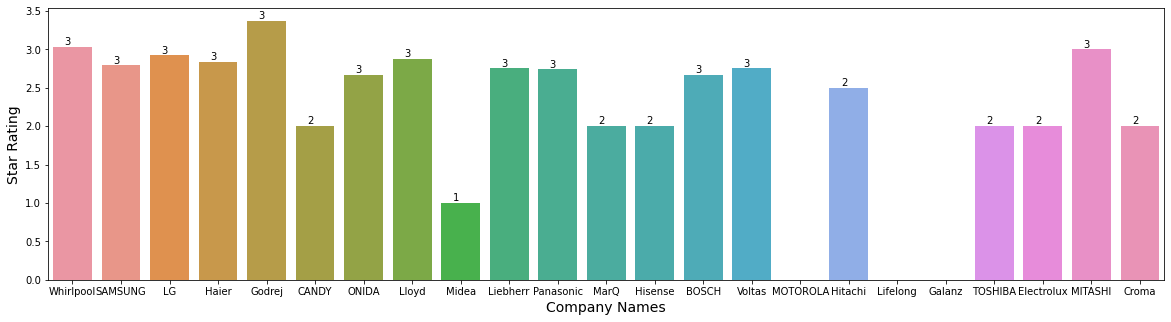

In [63]:
plt.figure(figsize=(20,5))
graph=sns.barplot(x="Company Name", 
    y="Star Rating",
    data=data,
    ci=None )

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.ylabel("Star Rating", size=14)
plt.xlabel("Company Names", size=14)

Text(0.5, 0, 'Company Names')

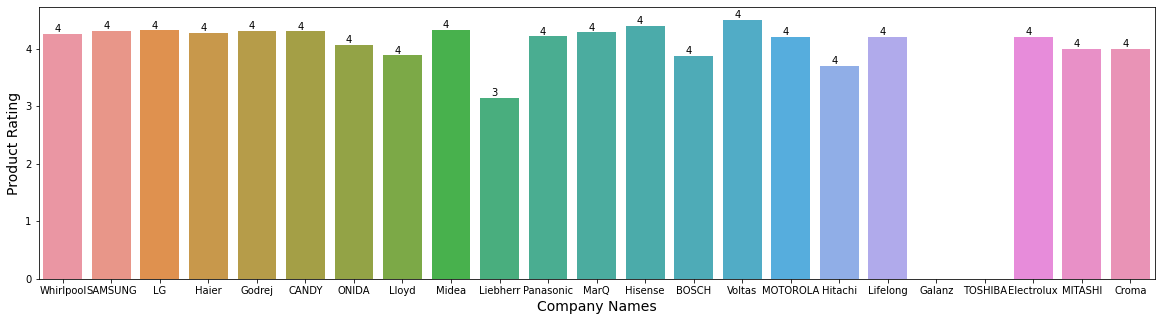

In [64]:
plt.figure(figsize=(20,5))
graph=sns.barplot(x="Company Name", 
    y="Product Rating",
    data=data,
    ci=None )

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.ylabel("Product Rating", size=14)
plt.xlabel("Company Names", size=14)

In [65]:
data['Star Rating'].fillna(data.groupby(["Company Name"])['Star Rating'].transform('mean'),inplace=True)

In [66]:
data['Star Rating'].fillna(data['Star Rating'].mean(),inplace=True)

In [67]:
data.isnull().sum()

Product Name             0
Product Rating         187
Prices in Rs             0
Max Price                0
In The Box               0
Door Type                0
Refrigerator Type        0
Defrosting Type          0
Compressor Type          0
Capacity                 0
Number of Doors          0
Star Rating              0
Coolpad                  0
Toughened Glass          0
Built-in Stabilizer      0
Company Name             0
Height                   2
Width                    2
Depth                    2
Weight                   2
dtype: int64

In [68]:
data['Star Rating']=data['Star Rating'].round()

In [69]:
data['Product Rating'].fillna(data.groupby(["Company Name"])['Product Rating'].transform('mean'),inplace=True)

In [70]:
data['Product Rating'].fillna(data['Product Rating'].mean(),inplace=True)

In [71]:
data.isnull().sum()

Product Name           0
Product Rating         0
Prices in Rs           0
Max Price              0
In The Box             0
Door Type              0
Refrigerator Type      0
Defrosting Type        0
Compressor Type        0
Capacity               0
Number of Doors        0
Star Rating            0
Coolpad                0
Toughened Glass        0
Built-in Stabilizer    0
Company Name           0
Height                 2
Width                  2
Depth                  2
Weight                 2
dtype: int64

In [72]:
data['Product Rating']=data['Product Rating'].round(decimals=1)

In [73]:
data.head()

,Product Name,Product Rating,Prices in Rs,Max Price,In The Box,Door Type,Refrigerator Type,Defrosting Type,Compressor Type,Capacity,Number of Doors,Star Rating,Coolpad,Toughened Glass,Built-in Stabilizer,Company Name,Height,Width,Depth,Weight
0,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,12740.0,14900.0,"1 Refrigerator Unit, Warranty Card, User Manual",Single Door,Top Freezer,Direct Cool,normal compressor,190,1,2.0,no,yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
1,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,11990.0,14400.0,"1 Refrigerator, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,normal compressor,190,1,2.0,no,no,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
3,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,13740.0,16000.0,"1 Refrigerator Unit, Warranty Card, User Manual",Single Door,Top Freezer,Direct Cool,normal compressor,190,1,2.0,no,yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
8,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,13699.0,16150.0,1 Refrigerator\nUser Manual and Warranty Card,Single Door,Top Freezer,Direct Cool,normal compressor,190,1,2.0,yes,yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg
10,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,13399.0,14950.0,"1 Refrigerator, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,normal compressor,190,1,2.0,no,yes,Yes,Whirlpool,1191 mm,536 mm,604 mm,32.4 kg


In [74]:
data.sample(10)

,Product Name,Product Rating,Prices in Rs,Max Price,In The Box,Door Type,Refrigerator Type,Defrosting Type,Compressor Type,Capacity,Number of Doors,Star Rating,Coolpad,Toughened Glass,Built-in Stabilizer,Company Name,Height,Width,Depth,Weight
97,Whirlpool 190 L Direct Cool Single Door 3 Star...,4.3,15599.0,16000.0,1 Refrigerator UnitManualWarranty Card,Single Door,Top Freezer,Direct Cool,rotary compressor,190,1,3.0,no,yes,Yes,Whirlpool,119.5 cm,53.5 cm,61.5 cm,32.4 kg
696,BOSCH 636 L Frost Free Side by Side Refrigerator,2.0,202290.0,238000.0,1 RefrigeratorUser Manual and Warranty Card,Side by Side,Not Known,Frost Free,normal compressor,636,2,3.0,yes,yes,No,BOSCH,175.6 cm,91.2 cm,73.2 cm,208 kg
116,Whirlpool 190 L Direct Cool Single Door 4 Star...,4.3,15490.0,18600.0,"1 Refrigerator Unit, Customer Manual, Warranty...",Single Door,Top Freezer,Direct Cool,inverter compressor,190,1,4.0,no,yes,Yes,Whirlpool,1300 mm,535 mm,615 mm,36.4 kg
249,Whirlpool 245 L Frost Free Double Door 2 Star ...,4.5,22610.0,27150.0,"1 Refrigerator, User Manual, Warranty Card",Double Door,Top Freezer,Frost Free,inverter compressor,245,2,2.0,no,yes,Yes,Whirlpool,1590 mm,570 mm,670 mm,49 kg
687,SAMSUNG 212 L Direct Cool Single Door 3 Star R...,4.3,15590.0,19990.0,"1 Unit Refrigerator, User Manual with Warranty...",Single Door,Top Freezer,Direct Cool,inverter compressor,212,1,3.0,no,yes,Yes,SAMSUNG,131.5 cm,53.6 cm,66.5 cm,32 kg
291,SAMSUNG 225 L Direct Cool Single Door 3 Star R...,4.3,19989.0,22990.0,"1 Refrigerator Unit, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,inverter compressor,225,1,3.0,no,yes,Yes,SAMSUNG,1336 mm,568 mm,664 mm,37.2 kg
62,SAMSUNG 192 L Direct Cool Single Door 3 Star R...,4.3,17714.0,19990.0,"1 Refrigerator Unit, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,inverter compressor,192,1,3.0,no,yes,Yes,SAMSUNG,118 cm,53.2 cm,64 cm,30 kg
361,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.5,15790.0,16300.0,"1 Unit Refrigerator, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,normal compressor,192,1,2.0,no,yes,Yes,SAMSUNG,1220 mm,536 mm,665 mm,30 kg
544,Godrej 190 L Direct Cool Single Door 4 Star Re...,4.0,19129.0,21600.0,"1 Refrigerator, User Manual and Warranty Card",Single Door,Top Freezer,Direct Cool,inverter compressor,190,1,4.0,no,yes,Yes,Godrej,1250 mm,597 mm,667 mm,36 kg
258,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.3,13990.0,19100.0,"1 Refrigerator, User Manual, Ice Tray, Key, Wa...",Single Door,Top Freezer,Direct Cool,normal compressor,192,1,2.0,no,yes,Yes,Haier,126.7 cm,53.3 mm,61.1 cm,37 kg


In [75]:
data[data['Height'].isnull()]

,Product Name,Product Rating,Prices in Rs,Max Price,In The Box,Door Type,Refrigerator Type,Defrosting Type,Compressor Type,Capacity,Number of Doors,Star Rating,Coolpad,Toughened Glass,Built-in Stabilizer,Company Name,Height,Width,Depth,Weight
685,Panasonic 194 L Direct Cool Single Door 3 Star...,4.2,15199.0,17990.0,"Main Unit, User Manual",Single Door,Top Freezer,Direct Cool,inverter compressor,194,1,3.0,no,yes,Yes,Panasonic,NaN,NaN,NaN,NaN
778,Panasonic 450 L Frost Free Double Door Bottom ...,4.2,59790.0,72000.0,"1 Refrigerator Unit, Ice Cube Tray, Egg Tray, ...",Double Door,Bottom Freezer,Frost Free,inverter compressor,450,2,3.0,no,yes,Yes,Panasonic,NaN,NaN,NaN,NaN


In [76]:
data=data.dropna(subset=['Height'])

In [77]:
data.isnull().sum()

Product Name           0
Product Rating         0
Prices in Rs           0
Max Price              0
In The Box             0
Door Type              0
Refrigerator Type      0
Defrosting Type        0
Compressor Type        0
Capacity               0
Number of Doors        0
Star Rating            0
Coolpad                0
Toughened Glass        0
Built-in Stabilizer    0
Company Name           0
Height                 0
Width                  0
Depth                  0
Weight                 0
dtype: int64

In [78]:
def replacefunction(a):
    data[a]=data[a].str.replace(" \D+","")
    
replacefunction('Height')
replacefunction('Width')
replacefunction('Depth')
replacefunction('Weight')

In [79]:
data.sample(10)

,Product Name,Product Rating,Prices in Rs,Max Price,In The Box,Door Type,Refrigerator Type,Defrosting Type,Compressor Type,Capacity,Number of Doors,Star Rating,Coolpad,Toughened Glass,Built-in Stabilizer,Company Name,Height,Width,Depth,Weight
223,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.3,18300.0,21990.0,"1 Refrigerator Unit, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,inverter compressor,198,1,4.0,no,yes,Yes,SAMSUNG,121.61,56.8,71.05,36.5
40,Haier 190 L Direct Cool Single Door 2 Star Ref...,4.3,13999.0,15300.0,"1 Refrigerator Unit, User Manual, Warranty Car...",Single Door,Top Freezer,Direct Cool,normal compressor,190,1,2.0,no,yes,Yes,Haier,115.5,53.1,62,32
163,Haier 258 L Frost Free Double Door 3 Star Conv...,4.2,23800.0,34600.0,"1 Refrigerator Unit, User Manual, Warranty Car...",Double Door,Top Freezer,Frost Free,inverter compressor,258,2,3.0,no,yes,Yes,Haier,1560,548,615,58
423,LG 260 L Frost Free Double Door 2 Star Refrige...,4.3,25999.0,30390.0,"1 Refrigerator, User Manual, Warranty Card",Double Door,Top Freezer,Frost Free,inverter compressor,260,2,2.0,yes,yes,Yes,LG,147.5,58.5,70.3,46
615,LG 188 L Direct Cool Single Door 3 Star Refrig...,4.3,15390.0,18390.0,"1 Refrigerator Unit, User Manual, Warranty Card",Single Door,Top Freezer,Direct Cool,inverter compressor,188,1,3.0,no,yes,Yes,LG,1296,537,631,33
428,LG 260 L Frost Free Double Door Top Mount 2 St...,4.3,22790.0,30390.0,REFRIGERATOR,Double Door,Top Freezer,Frost Free,inverter compressor,260,2,2.0,no,yes,Yes,LG,1475,585,669,48
82,SAMSUNG 275 L Frost Free Double Door 3 Star Co...,3.5,31255.0,35990.0,"1 Refrigerator Unit, User Manual with Warranty...",Double Door,Top Freezer,Frost Free,inverter compressor,275,2,3.0,no,yes,Yes,SAMSUNG,1635,637,555,50
325,SAMSUNG 255 L Direct Cool Single Door 3 Star R...,4.3,20390.0,25990.0,"1 Unit Refrigerator, User Manual with Warranty...",Single Door,Top Freezer,Direct Cool,inverter compressor,255,1,3.0,yes,yes,Yes,SAMSUNG,161.5,54.9,64,45
523,SAMSUNG 265 L Frost Free Double Door 3 Star Co...,4.3,31800.0,36990.0,"1 Refrigerator Unit, User Manual with Warranty...",Double Door,Top Freezer,Frost Free,inverter compressor,265,2,3.0,no,yes,Yes,SAMSUNG,1635,637,555,50
306,SAMSUNG 244 L Frost Free Double Door 3 Star Co...,4.5,33900.0,33990.0,"1 Refrigerator Unit, User Manual with Warranty...",Double Door,Top Freezer,Frost Free,inverter compressor,244,2,3.0,no,yes,Yes,SAMSUNG,1673,566,637,49


In [82]:
data['Height']=pd.to_numeric(data['Height'])
data['Width']=pd.to_numeric(data['Width'])
data['Depth']=pd.to_numeric(data['Depth'])
data['Weight']=pd.to_numeric(data['Weight'])

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 832
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         778 non-null    object 
 1   Product Rating       778 non-null    float64
 2   Prices in Rs         778 non-null    float64
 3   Max Price            778 non-null    float64
 4   In The Box           778 non-null    object 
 5   Door Type            778 non-null    object 
 6   Refrigerator Type    778 non-null    object 
 7   Defrosting Type      778 non-null    object 
 8   Compressor Type      778 non-null    object 
 9   Capacity             778 non-null    int64  
 10  Number of Doors      778 non-null    int64  
 11  Star Rating          778 non-null    float64
 12  Coolpad              778 non-null    object 
 13  Toughened Glass      778 non-null    object 
 14  Built-in Stabilizer  778 non-null    object 
 15  Company Name         778 non-null    obj

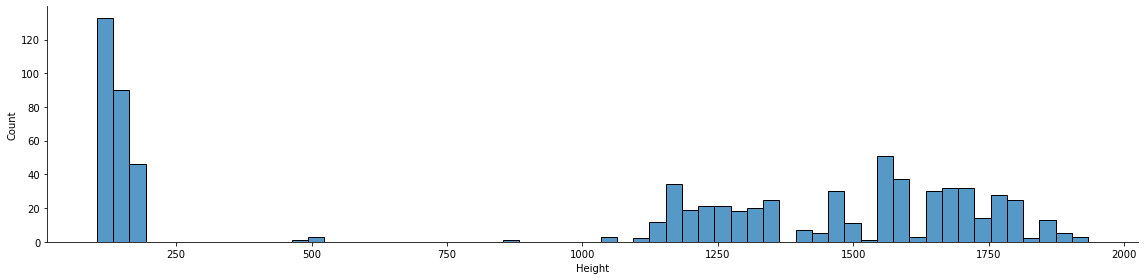

In [103]:
sns.displot(x='Height',data=data,binwidth=30,height=4,aspect=4)

In [ ]:
x=data['Height']
data['Height']=data['Height'].apply(lambda x: data['Height']/10 if x>300 else x)

In [125]:
test=lambda x: data['Height']/10 if x>300 else x
test(data['Height'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [134]:
data['Height'] for (data['Height']>300):
    p=(data['Height'].div(10))

SyntaxError: invalid syntax (<ipython-input-134-30729db40172>, line 1)

In [129]:
p.unique()

array([119.1  , 154.5  ,  13.25 , 147.5  ,  15.2  ,  11.55 ,  13.252,
       117.2  ,  13.26 ,  11.8  ,  12.6  , 133.8  ,  15.45 , 141.   ,
       163.5  ,  11.95 ,  12.18 ,  14.37 , 131.   ,  12.47 , 103.5  ,
       130.   , 177.3  ,  13.   , 121.8  ,  16.4  , 144.5  , 133.   ,
        12.2  , 156.   ,  14.7  , 179.   , 132.6  , 114.2  ,  15.9  ,
        15.   ,  10.75 ,  15.3  ,  12.16 , 174.   , 159.   ,  15.6  ,
       177.   ,  12.161, 118.4  , 167.3  , 110.5  , 170.   , 168.5  ,
        12.67 , 176.   , 169.1  ,  14.1  , 132.5  , 117.3  , 172.   ,
       166.   ,  16.8  ,  17.8  ,  13.38 , 133.6  , 174.7  , 178.8  ,
        10.37 , 124.7  ,  16.15 , 185.   , 171.5  , 126.7  , 121.6  ,
       104.   , 155.   , 135.5  ,  12.8  , 109.7  , 122.   ,  13.32 ,
       149.5  , 150.   ,  14.75 ,  14.48 ,  50.1  ,  12.7  ,  13.33 ,
       148.   , 193.   , 124.5  , 168.   , 145.9  , 178.   , 177.6  ,
       151.8  , 180.   , 169.5  , 143.7  , 129.   ,  18.25 , 177.7  ,
       157.5  , 181.

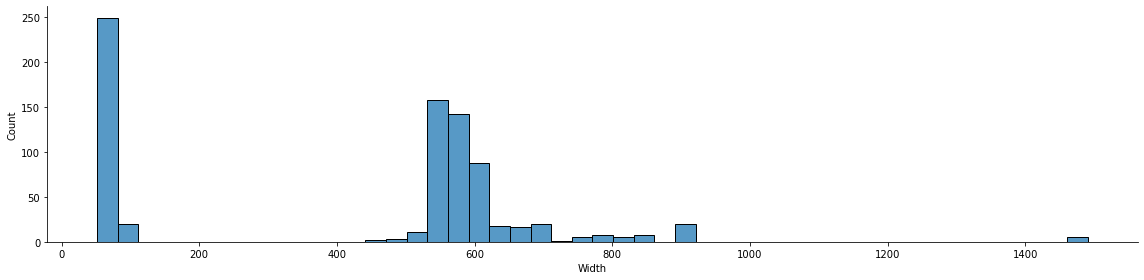

In [104]:
sns.displot(x='Width',data=data,binwidth=30,height=4,aspect=4)

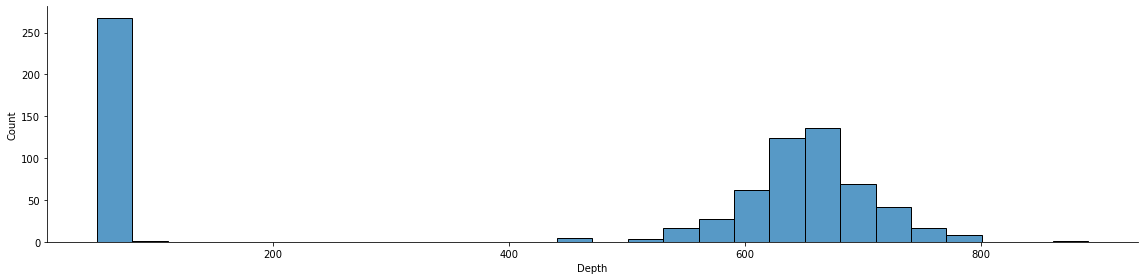

In [106]:
sns.displot(x='Depth',data=data,binwidth=30,height=4,aspect=4)